## Discussion 1: Multiple Linear Regression

Earlier this week, we looked at predicting abalone ____ based on ____.  However, you will often want to look at the effect of multiple predictors on your outcome variable. This is where multiple linear regression comes in! In python, the structure is very similar to a simple linear regression. Let's review a simple linear regression first and then go on to add multiple predictor variables. 

## About the data

For this discussion section, we will use data from EM-DAT, The International Disaster Database. The data is provided to you as an Excel sheet here. You can find the documentation for this dataset [here](https://doc.emdat.be/docs/data-structure-and-content/impact-variables/). This dataset is looking at natural disasters that took place between 2000 and 2024 in the Americas. 

### Import libraries and Load the data

Use the `pandas.read_excel` function to read in your data. You can find more documentation on reading in .xlsx files [here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html). 

In [3]:
import pandas as pd

In [34]:
pd.set_option('display.max_columns', None)


disasters = pd.read_excel('../data/natural_disasters.xlsx')
disasters.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0004-BRA,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BRA,Brazil,Latin America and the Caribbean,Americas,Pouso Redondo (Etat de Santa Catarina),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,12.0,2000,1.0,12.0,42.0,71.0,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
1,2000-0008-GTM,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Pacaya,GTM,Guatemala,Latin America and the Caribbean,Americas,"El Caracol, El Patrocinio, El Rodeo, San Franc...",NaN,NaN,No,No,No,NaN,NaN,NaN,14.381,-90.601,NaN,2000,1.0,16.0,2000,1.0,16.0,NaN,NaN,800.0,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":64911,""adm2_name"":""San Vicente P...",2014-07-28,2023-09-25
2,2000-0015-PER,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,PER,Peru,Latin America and the Caribbean,Americas,San Francisco (Ayacucho department),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,1.0,2000,1.0,1.0,29.0,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2005-07-22,2023-09-25
3,2000-0019-BRA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BRA,Brazil,Latin America and the Caribbean,Americas,"Rio de Janeiro city (Rio de Janeiro district, ...",Heavy rains,"Slide (land, mud, snow, rock)",No,No,Yes,NaN,350000.0,Km2,NaN,NaN,"Paraiba, Tiete, Maracana, Rio Verde",2000,1.0,1.0,2000,1.0,6.0,26.0,NaN,NaN,70000.0,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":8467,""adm2_name"":""Pirangucu""},{""...",2005-07-08,2023-09-25
4,2000-0021-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,Northern America,Americas,"Crittenden, Daviess, Webster districts (Kentuc...",NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2000,1.0,2.0,2000,1.0,4.0,1.0,12.0,NaN,150.0,162.0,NaN,NaN,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25


### Examine the data

Take a look at the data and note if there are a lot of missing variables, how big your dataset is, and examine the different columns in the dataset. What kinds of disasters are most common in this dataset? 

In [35]:
# Check the shape of the dataframe for reference on missing data
disasters.shape

(3161, 46)

In [36]:
# Check for NA values
disasters.isna().sum()

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 2635
Event Name                                   2253
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                      112
Origin                                       2266
Associated Types                             2161
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  3057


In [37]:
# Check what type of disasters are most common
disasters['Disaster Subtype'].value_counts()

Disaster Subtype
Riverine flood                      480
Tropical cyclone                    437
Road                                387
Flood (General)                     306
Tornado                             112
Air                                 103
Ground movement                     102
Drought                             100
Flash flood                          95
Water                                93
Forest fire                          82
Severe weather                       81
Blizzard/Winter storm                81
Landslide (wet)                      70
Storm (General)                      67
Viral disease                        65
Fire (Miscellaneous)                 61
Wildfire (General)                   44
Cold wave                            42
Lightning/Thunderstorms              40
Ash fall                             39
Explosion (Industrial)               35
Rail                                 26
Miscellaneous accident (General)     23
Explosion (Miscellaneou

### Exploratory Analysis

In your groups, pick a couple relationships that are interesting to you and make some sort of plot. 

In [38]:
filtered_disasters = disasters[disasters['Disaster Subtype'].isin(["Riverine flood", "Tropical cyclone", "Road", "Flood (General)", "Tornado"])]
filtered_disasters

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0004-BRA,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BRA,Brazil,Latin America and the Caribbean,Americas,Pouso Redondo (Etat de Santa Catarina),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,12.0,2000,1.0,12.0,42.0,71.0,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
2,2000-0015-PER,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,PER,Peru,Latin America and the Caribbean,Americas,San Francisco (Ayacucho department),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,1.0,2000,1.0,1.0,29.0,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2005-07-22,2023-09-25
3,2000-0019-BRA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BRA,Brazil,Latin America and the Caribbean,Americas,"Rio de Janeiro city (Rio de Janeiro district, ...",Heavy rains,"Slide (land, mud, snow, rock)",No,No,Yes,NaN,350000.0,Km2,NaN,NaN,"Paraiba, Tiete, Maracana, Rio Verde",2000,1.0,1.0,2000,1.0,6.0,26.0,NaN,NaN,70000.0,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":8467,""adm2_name"":""Pirangucu""},{""...",2005-07-08,2023-09-25
4,2000-0021-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,Northern America,Americas,"Crittenden, Daviess, Webster districts (Kentuc...",NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2000,1.0,2.0,2000,1.0,4.0,1.0,12.0,NaN,150.0,162.0,NaN,NaN,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25
6,2000-0067-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,United States of America,Northern America,Americas,"Bullock, Montgomery districts (Alabama provinc...",NaN,NaN,No,No,No,NaN,249.0,Kph,NaN,NaN,NaN,2000,2.0,13.0,2000,2.0,14.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,2024-0722-USA,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Milton',USA,United States of America,Northern America,Americas,"Hillsborough, Pinellas, Sarasota Volusia, Sain...",NaN,Flood|Surge,No,No,Yes,NaN,205.0,Kph,NaN,NaN,NaN,2024,10.0,9.0,2024,10.0,10.0,17.0,13.0,1000.0,NaN,1013.0,NaN,NaN,NaN,NaN,10000000.0,NaN,NaN,NaN,2024-10-10,2024-10-28
3148,2024-0782-CUB,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2024-000192,Tropical cyclone 'Oscar',CUB,Cuba,Latin America and the Caribbean,Americas,"Imías and San Antonio del Sur, Maisí and Barac...",NaN,"Flood|Slide (land, mud, snow, rock)|Surge",No,No,Yes,NaN,139.0,Kph,NaN,NaN,NaN,2024,10.0,20.0,2024,10.0,21.0,10.0,NaN,320000.0,NaN,320000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-28,2024-11-04
3150,2024-0795-MEX,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Nadine',MEX,Mexico,Latin America and the Caribbean,Americas,"Chiapas, Veracruz, and Tabasco states",NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2024,10.0,15.0,2024,10.0,19.0,3.0,NaN,3900.0,NaN,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-28,2024-11-05
3154,2024-0822-CUB,No,nat-met-sto-tro,Natural,Me

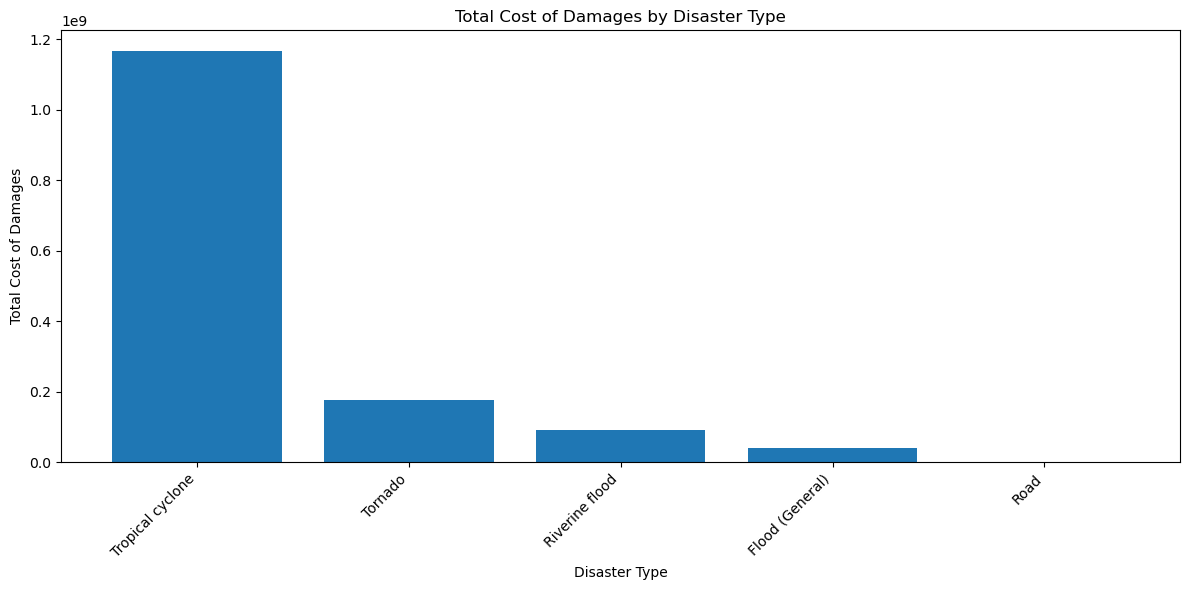

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Disaster Subtype' and calculate the total cost of damages
damage_totals = filtered_disasters.groupby('Disaster Subtype')["Total Damage, Adjusted ('000 US$)"].sum().reset_index()

# Sort values for better visualization
damage_totals = damage_totals.sort_values(by="Total Damage, Adjusted ('000 US$)", ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(damage_totals['Disaster Subtype'], damage_totals["Total Damage, Adjusted ('000 US$)"])

# Customize the plot
plt.xlabel('Disaster Type')
plt.ylabel('Total Cost of Damages')
plt.title('Total Cost of Damages by Disaster Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


### Simple Linear regression

Let's now make a simple linear regression predicting the total number of deaths 